## **Regression Using Feed Forward Neural Network (FFNN)**

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

# **Accessing the Dataset**

In [ ]:
house = fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
house['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
house['data'].shape

(20640, 8)

In [ ]:
house['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# Feature set creation - for creating a DataFrame 

X = pd.DataFrame(house['data'], columns=house['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Target Variable 

house['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
house['target_names']

['MedHouseVal']

In [ ]:
# Target 

y = pd.DataFrame(house['target'], columns=house['target_names'])
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


## **Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

## **Splitting Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## **Building the Model**

In [ ]:
model_1 = tf.keras.Sequential() 

# No need to specify the input layer, as by default it is equal to the number of features/columns
# But for Image, Video, etc data, where features are explicitly not available, there we need to specify 

model_1.add(tf.keras.layers.Dense(20,activation='relu'))
model_1.add(tf.keras.layers.Dense(1,activation=None))  

# activation = None, means Linear by default. We need linear as its a Regression problem, we need 1 output and we DO NOT NEED ANY MANIPULATION IN THE OUTPUT VALUE, so NO activation
# If we put activation as 'relu', it will involve some output manipulation
# Puropse of the activation funtion is to hold the Non-Linear realtionship between the Input and the Output 
# Purpose is also to use Continuous functions (slope calculated everystep, continuous differentiable functions)
# Input layer should consist of 8 units / holding places
# Model should be able to predict 1 value for 1 input which consists of 8 units 
# Hidden Layers can generally have 10 - 100 units 
# No rule for number of Hidden Layers - If we do not have any idea then you can start with 1 Hidden Layer  

## **Compiling the Model**

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=['mae'])

## **Training the Model**

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 1.8401 - mae: 0.9575
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.6212 - mae: 0.5630
Epoch 3/100
516/516 [==============================] - 0s 947us/step - loss: 0.4905 - mae: 0.5037
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4388 - mae: 0.4758
Epoch 5/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4185 - mae: 0.4627
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4092 - mae: 0.4572
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3995 - mae: 0.4505
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.3933 - mae: 0.4469
Epoch 9/100
516/516 [==============================] - 1s 973us/step - loss: 0.3877 - mae: 0.4432
Epoch 10/100
516/516 [==============================] - 1s 993us/step - loss: 0.3829 - mae: 0.4404
Epoch 11/100
516/516 [===========

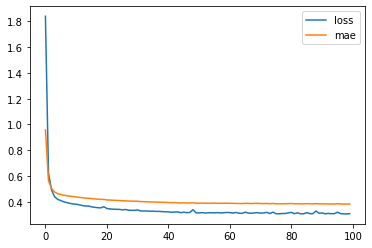

In [ ]:
tf.random.set_seed(100)
history = model_1.fit(X_train,y_train,epochs=100)
hist = pd.DataFrame(history.history)
hist.plot();

In [ ]:
# 516/516 means a total of 516 batches with 32 datapoints each - Total 16512 (516*32) datapoints in the Dataset 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 20)                  180       
                                                                 
 dense_1 (Dense)             (32, 1)                   21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


## **Plotting**

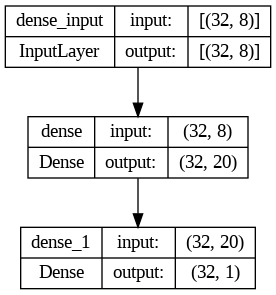

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model_1,show_shapes=True)

## **Evalutation of Model**

In [ ]:
test_mse, test_mae = model_1.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.2937 - mae: 0.3780


In [ ]:
# Total points in Test data = 129 batches of 32 datapoints each 

In [ ]:
print('Test MSE:',test_mse)
print('Train MSE: 0.3076')  # From earlier - last loss value of epoch 100/100
print('\n\nTest MAE:',test_mae)
print('Train MAE: 0.3835') # From earlier - last mae value of epoch 100/100

Test MSE: 0.29374971985816956
Train MSE: 0.3076


Test MAE: 0.3780365288257599
Train MAE: 0.3835


In [ ]:
# Both values show that its a good model as the train and test values are almost same 

## **Prediction using Model**

In [ ]:
y_pred = model_1.predict(X_test)
print('The predicted house prices:\n', y_pred)

129/129 [==============================] - 0s 923us/step
The predicted house prices:
 [[2.440057 ]
 [1.400035 ]
 [1.3969451]
 ...
 [1.6530576]
 [0.8416471]
 [1.1105689]]


In [ ]:
y_test

,MedHouseVal
8151,2.45300
53,1.04200
3039,1.46200
9484,1.54200
9307,3.24200
...,...
16733,1.17200
5264,5.00001
12374,2.39300
19662,0.85700
